<a href="https://colab.research.google.com/github/inayan60/PersonalPortifolio/blob/main/Despesas_Joinville_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria"


In [5]:
url = "https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria"
params = {
    "periodo_inicial": "01/2025",
    "periodo_final": "08/2025",
    "codigo_unidade": 0
}
response = requests.get(url, params=params)
data = response.json()

In [6]:
registros = data["registros"]

In [7]:
df = pd.json_normalize([r["registro"] for r in registros])

In [8]:
df.columns

Index(['listMovimentos', 'classificacaoCompleta.classificacaoCompleta',
       'despesa.funcao.codigo', 'despesa.funcao.denominacao',
       'despesa.subfuncao.codigo', 'despesa.subfuncao.denominacao',
       'despesa.programa.codigo', 'despesa.programa.denominacao',
       'despesa.acao.codigo', 'despesa.acao.denominacao',
       'naturezaDespesa.categoriaEconomica.codigo',
       'naturezaDespesa.categoriaEconomica.codigoCompleto',
       'naturezaDespesa.categoriaEconomica.denominacao',
       'naturezaDespesa.grupo.codigo', 'naturezaDespesa.grupo.codigoCompleto',
       'naturezaDespesa.grupo.denominacao',
       'naturezaDespesa.modalidadeAplicacao.codigo',
       'naturezaDespesa.modalidadeAplicacao.codigoCompleto',
       'naturezaDespesa.modalidadeAplicacao.denominacao',
       'naturezaDespesa.elemento.codigo',
       'naturezaDespesa.elemento.codigoCompleto',
       'naturezaDespesa.elemento.denominacao', 'fonteRecurso.codigo',
       'fonteRecurso.denominacao', 'exercicio.ex

In [9]:
df.describe()

,despesa.funcao.codigo,despesa.subfuncao.codigo,despesa.programa.codigo,despesa.acao.codigo,naturezaDespesa.categoriaEconomica.codigo,naturezaDespesa.grupo.codigo,naturezaDespesa.modalidadeAplicacao.codigo,naturezaDespesa.elemento.codigo,fonteRecurso.codigo,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,naturezaDespesa
count,23757.000000,23757.000000,23746.000000,23746.000000,23002.000000,23002.000000,23002.000000,23002.000000,23757.000000,23757.0,23757.000000,23757.0,23757.000000,0.0
mean,14.344320,371.261312,4.552851,3253.465594,3.063951,2.593470,89.006217,34.565777,198.242623,2025.0,30937.190681,0.0,30936.187229,NaN
std,7.287852,235.047652,2.103113,108.201474,0.244671,0.952129,6.219204,18.125196,765.159506,0.0,31840.381645,0.0,31840.379792,NaN
min,4.000000,92.000000,1.000000,3000.000000,3.000000,1.000000,30.000000,7.000000,100.000000,2025.0,2001.000000,0.0,2000.000000,NaN
25%,11.000000,123.000000,3.000000,3182.000000,3.000000,3.000000,90.000000,14.000000,100.000000,2025.0,6001.000000,0.0,6000.000000,NaN
50%,12.000000,365.000000,4.000000,3211.000000,3.000000,3.000000,90.000000,39.000000,100.000000,2025.0,7001.000000,0.0,7000.000000,NaN
75%,18.000000,451.000000,7.000000,3381.750000,3.000000,3.000000,90.000000,48.000000,101.000000,2025.0,73001.000000,0.0,73000.000000,NaN
max,28.000000,846.000000,9.000000,3402.000000,4.000000,6.000000,91.000000,97.000000,10364.000000,2025.0,90001.000000,0.0,90000.000000,NaN


In [10]:
df.shape

(23757, 32)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23757 entries, 0 to 23756
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   listMovimentos                                          23757 non-null  object 
 1   classificacaoCompleta.classificacaoCompleta             23757 non-null  object 
 2   despesa.funcao.codigo                                   23757 non-null  int64  
 3   despesa.funcao.denominacao                              23757 non-null  object 
 4   despesa.subfuncao.codigo                                23757 non-null  int64  
 5   despesa.subfuncao.denominacao                           23757 non-null  object 
 6   despesa.programa.codigo                                 23746 non-null  float64
 7   despesa.programa.denominacao                            23746 non-null  object 
 8   despesa.acao.codigo                 

In [12]:
df["despesa.funcao.denominacao"].value_counts()

,count
despesa.funcao.denominacao,
Educação,6398
Urbanismo,3782
Desporto e Lazer,3493
Administração,2951
Assistência Social,2341
Cultura,904
Comunicações,883
Gestão Ambiental,822
Segurança Pública,609


In [13]:
df[df['despesa.funcao.denominacao'] == 'Educação'].head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,...,fonteRecurso.codigo,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa
0,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN
4,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN
5,"[{'dataMovimento': '2025-06-26', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,101,Receitas e Transferências de Impostos - Educação,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN
6,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN
10,"[{'dataMovimento': '2025-05-06', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN


In [14]:
# Explode the 'listMovimentos' column to have one row per movement
df_exploded = df.explode('listMovimentos')

# Reset the index of df_exploded to make it unique
df_exploded = df_exploded.reset_index(drop=True)

# Normalize the exploded 'listMovimentos' column to extract 'dataMovimento' and 'valorMovimento'
df_movements = pd.json_normalize(df_exploded['listMovimentos'])

# Concatenate the original DataFrame (excluding the original 'listMovimentos' column) with the new movements DataFrame
df_processed = pd.concat([df_exploded.drop(columns=['listMovimentos']), df_movements], axis=1)

# Convert 'dataMovimento' to datetime
df_processed['dataMovimento'] = pd.to_datetime(df_processed['dataMovimento'])

# Convert 'valorMovimento' to numeric, coercing errors
df_processed['valorMovimento'] = pd.to_numeric(df_processed['valorMovimento'], errors='coerce')

# Display the head of the processed DataFrame
display(df_processed.head())

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,dataMovimento,tipoMovimento,valorMovimento
0,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,3.0,...,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN,2025-05-28,Emissão de empenho,24505.0
1,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,3.0,...,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN,2025-06-11,Empenho em liquidação,19227.0
2,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,3.0,...,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN,2025-06-18,Liquidação de empenho,19227.0
3,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,3.0,...,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN,2025-06-26,Anulação de empenho,5278.0
4,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,3.0,...,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,NaN,2025-07-08,Pagamento de empenho,19227.0


In [15]:

df_processed["despesa.funcao.denominacao"].value_counts()

,count
despesa.funcao.denominacao,
Educação,29278
Urbanismo,20124
Administração,14323
Desporto e Lazer,12640
Assistência Social,9359
Gestão Ambiental,4244
Comunicações,3869
Cultura,3857
Segurança Pública,2737


In [16]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107150 entries, 0 to 107149
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count   Dtype         
---  ------                                                  --------------   -----         
 0   classificacaoCompleta.classificacaoCompleta             107150 non-null  object        
 1   despesa.funcao.codigo                                   107150 non-null  int64         
 2   despesa.funcao.denominacao                              107150 non-null  object        
 3   despesa.subfuncao.codigo                                107150 non-null  int64         
 4   despesa.subfuncao.denominacao                           107150 non-null  object        
 5   despesa.programa.codigo                                 107128 non-null  float64       
 6   despesa.programa.denominacao                            107128 non-null  object        
 7   despesa.acao.codigo                            

In [17]:
import plotly.express as px

In [18]:
gastos_jlle = df_processed.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False).reset_index()

fig = px.bar(gastos_jlle,
             x="despesa.funcao.denominacao",
             y="valorMovimento",
             title= 'Gastos 2025',
             labels={'despesa.funcao.denominacao': 'Setores', 'valorMovimento': 'Total Gasto'}
             )
fig.show()

In [19]:
df_processed[df_processed['despesa.funcao.denominacao'] == 'Cultura'].head()

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,dataMovimento,tipoMovimento,valorMovimento
7696,0.74001.13.391.5.3260.0.33903916,13,Cultura,391,"Patrimônio Histórico, Artístico e Arqueológico",5.0,Joinville Acolhedora,3260.0,"Dinamização, manutenção e preservação de equip...",3.0,...,74001,Secretaria de Cultura e Turismo - SECULT,0,Prefeitura Municipal de Joinville - PMJ,74000,Secretaria de Cultura e Turismo - SECULT,NaN,2025-03-20,Emissão de empenho,125000.0
7697,0.74001.13.391.5.3260.0.33903916,13,Cultura,391,"Patrimônio Histórico, Artístico e Arqueológico",5.0,Joinville Acolhedora,3260.0,"Dinamização, manutenção e preservação de equip...",3.0,...,74001,Secretaria de Cultura e Turismo - SECULT,0,Prefeitura Municipal de Joinville - PMJ,74000,Secretaria de Cultura e Turismo - SECULT,NaN,2025-04-17,Empenho em liquidação,125000.0
7698,0.74001.13.391.5.3260.0.33903916,13,Cultura,391,"Patrimônio Histórico, Artístico e Arqueológico",5.0,Joinville Acolhedora,3260.0,"Dinamização, manutenção e preservação de equip...",3.0,...,74001,Secretaria de Cultura e Turismo - SECULT,0,Prefeitura Municipal de Joinville - PMJ,74000,Secretaria de Cultura e Turismo - SECULT,NaN,2025-04-24,Liquidação de empenho,125000.0
7699,0.74001.13.391.5.3260.0.33903916,13,Cultura,391,"Patrimônio Histórico, Artístico e Arqueológico",5.0,Joinville Acolhedora,3260.0,"Dinamização, manutenção e preservação de equip...",3.0,...,74001,Secretaria de Cultura e Turismo - SECULT,0,Prefeitura Municipal de Joinville - PMJ,74000,Secretaria de Cultura e Turismo - SECULT,NaN,2025-04-24,Retenção de empenho,9500.0
7700,0.74001.13.391.5.3260.0.33903916,13,Cultura,391,"Patrimônio Histórico, Artístico e Arqueológico",5.0,Joinville Acolhedora,3260.0,"Dinamização, manutenção e preservação de equip...",3.0,...,74001,Secretaria de Cultura e Turismo - SECULT,0,Prefeitura Municipal de Joinville - PMJ,74000,Secretaria de Cultura e Turismo - SECULT,NaN,2025-05-20,Pagamento de empenho,115500.0


In [20]:
df_processed[df_processed['despesa.funcao.denominacao'] == 'Cultura']['despesa.subfuncao.denominacao'].value_counts()

,count
despesa.subfuncao.denominacao,
Difusão Cultural,1961
Administração Geral,1168
"Patrimônio Histórico, Artístico e Arqueológico",448
Infra-Estrutura Urbana,280


In [23]:
df_processed.isnull().sum()

,0
classificacaoCompleta.classificacaoCompleta,0
despesa.funcao.codigo,0
despesa.funcao.denominacao,0
despesa.subfuncao.codigo,0
despesa.subfuncao.denominacao,0
despesa.programa.codigo,22
despesa.programa.denominacao,22
despesa.acao.codigo,22
despesa.acao.denominacao,22
naturezaDespesa.categoriaEconomica.codigo,14138


In [24]:
# Get columns with no null values
not_null_columns = df_processed.columns[df_processed.notnull().all()]

# Create the new DataFrame with only these columns
df_despesas = df_processed[not_null_columns]

# Display info about the new DataFrame to confirm
display(df_despesas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107150 entries, 0 to 107149
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count   Dtype         
---  ------                                                  --------------   -----         
 0   classificacaoCompleta.classificacaoCompleta             107150 non-null  object        
 1   despesa.funcao.codigo                                   107150 non-null  int64         
 2   despesa.funcao.denominacao                              107150 non-null  object        
 3   despesa.subfuncao.codigo                                107150 non-null  int64         
 4   despesa.subfuncao.denominacao                           107150 non-null  object        
 5   fonteRecurso.codigo                                     107150 non-null  int64         
 6   fonteRecurso.denominacao                                107150 non-null  object        
 7   exercicio.exercicio                            

None

In [25]:
df_despesas.isnull().sum()

,0
classificacaoCompleta.classificacaoCompleta,0
despesa.funcao.codigo,0
despesa.funcao.denominacao,0
despesa.subfuncao.codigo,0
despesa.subfuncao.denominacao,0
fonteRecurso.codigo,0
fonteRecurso.denominacao,0
exercicio.exercicio,0
unidadeOrcamentaria.codigo,0
unidadeOrcamentaria.denominacao,0


In [26]:
df_despesas.head()

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,fonteRecurso.codigo,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,dataMovimento,tipoMovimento,valorMovimento
0,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,2025-05-28,Emissão de empenho,24505.0
1,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,2025-06-11,Empenho em liquidação,19227.0
2,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,2025-06-18,Liquidação de empenho,19227.0
3,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,2025-06-26,Anulação de empenho,5278.0
4,0.6001.12.782.4.3387.0.33903932,12,Educação,782,Transporte Rodoviário,119,Transferências do FUNDEB - (aplicação em outra...,2025,6001,Secretaria de Educação - SED,0,Prefeitura Municipal de Joinville - PMJ,6000,Secretaria de Educação - SED,2025-07-08,Pagamento de empenho,19227.0


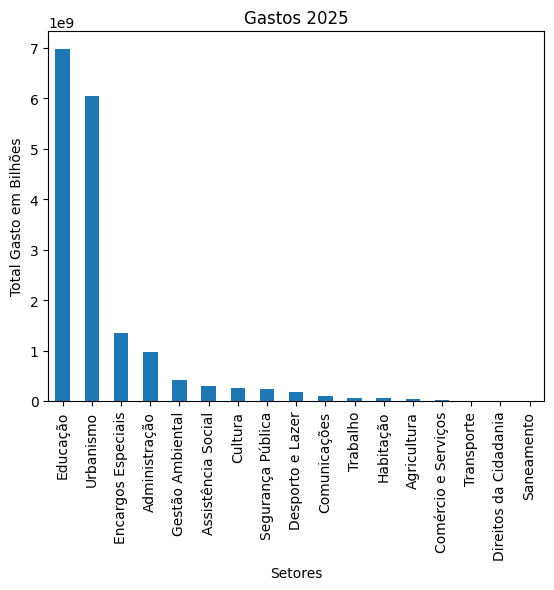

In [29]:
gastos_jlle = df_despesas.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

gastos_jlle.plot(kind="bar")
plt.ylabel("Total Gasto em Bilhões")
plt.xlabel("Setores")
plt.title("Gastos 2025")
plt.show()